In [41]:
%matplotlib inline

In [72]:
import csv
import random

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [73]:
g = nx.Graph() # Build the graph

In [44]:
# Read the CSV file and process data
with open("spotify_tracks.csv", "r", encoding="utf-8") as in_file:
    musicbox = list(csv.DictReader(in_file))  # Convert to a list for multiple iterations

    # Add nodes using singer names (removing featured artists)
    for row in musicbox:
        singer_name = row['artists'].split(',')[0].strip()  # Remove featured artists
        g.add_node(singer_name)  # Store singer as a node

# Generate all possible connections based on shared genres
connections = []
for i in range(len(musicbox)):
    for j in range(i + 1, len(musicbox)):  # Avoid duplicate edges
        if musicbox[i]['genre'] == musicbox[j]['genre']:  # Connect singers sharing the same genre
            left_singer = musicbox[i]['artists'].split(',')[0].strip()
            right_singer = musicbox[j]['artists'].split(',')[0].strip()
            connections.append((left_singer, right_singer))

# Add edges using singer names
for left_singer, right_singer in connections[:10]:  # Take first 10 pairs
    g.add_edge(left_singer, right_singer)




In [45]:
degree_centrality = nx.degree_centrality(g)
print(degree_centrality)


{'Billy Raffoul': 0.002319647413593134, 'Molly Hocking': 0.00023196474135931338, 'The Goo Goo Dolls': 0.00023196474135931338, 'Guus Dielissen': 0.00023196474135931338, 'Ling tosite sigure': 0.00023196474135931338, 'Benson Boone': 0.00023196474135931338, 'Sonido de Agua en Bambu': 0.00023196474135931338, 'Healing Solfeggio Frequencies': 0.00023196474135931338, 'Roses & Frey': 0.00023196474135931338, 'The Re-Stoned': 0.0, 'Sam Smith': 0.0, 'The Moon Loungers': 0.0, 'Lesfm': 0.0, 'SLANDER': 0.0, 'Cody Fry': 0.0, 'Mortal Treason': 0.0, 'Frank Ocean': 0.0, 'Girl in the Distance': 0.0, 'Simon & Garfunkel': 0.0, 'Jonah Baker': 0.0, 'Puppe Music': 0.0, 'SYML': 0.0, 'Acoustic Levitation': 0.0, 'Trainman': 0.0, 'Hillside Recording': 0.0, 'Acoustics': 0.0, 'Kondor': 0.0, 'Jason Derulo': 0.0, 'Acoustic Quarter': 0.0, 'Helios Jazz Club': 0.0, 'AJR': 0.0, 'Devin The Dude': 0.0, 'Ben Weighill': 0.0, 'David AI': 0.0, 'SZA': 0.0, 'Jay Filson': 0.0, 'U Know & The Drill': 0.0, 'Matt Johnson': 0.0, 'XtraV

In [46]:
eigenvector_centrality = nx.eigenvector_centrality(g)
print(list(eigenvector_centrality.items())[:10])

[('Billy Raffoul', 0.7661810743010481), ('Molly Hocking', 0.22720215703311852), ('The Goo Goo Dolls', 0.22720215703311852), ('Guus Dielissen', 0.22720215703311852), ('Ling tosite sigure', 0.22720215703311852), ('Benson Boone', 0.22720215703311852), ('Sonido de Agua en Bambu', 0.22720215703311852), ('Healing Solfeggio Frequencies', 0.22720215703311852), ('Roses & Frey', 0.22720215703311852), ('The Re-Stoned', 1.5158694885664933e-07)]


In [47]:
closeness_centrality = nx.closeness_centrality(g)

In [48]:
top_k = 20  # How many of the most central nodes to print
for u in sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:top_k]:
    print(u, degree_centrality[u])  # u = Singer Name, degree_centrality[u] = Centrality

Billy Raffoul 0.002319647413593134
Molly Hocking 0.00023196474135931338
The Goo Goo Dolls 0.00023196474135931338
Guus Dielissen 0.00023196474135931338
Ling tosite sigure 0.00023196474135931338
Benson Boone 0.00023196474135931338
Sonido de Agua en Bambu 0.00023196474135931338
Healing Solfeggio Frequencies 0.00023196474135931338
Roses & Frey 0.00023196474135931338
The Re-Stoned 0.0
Sam Smith 0.0
The Moon Loungers 0.0
Lesfm 0.0
SLANDER 0.0
Cody Fry 0.0
Mortal Treason 0.0
Frank Ocean 0.0
Girl in the Distance 0.0
Simon & Garfunkel 0.0
Jonah Baker 0.0


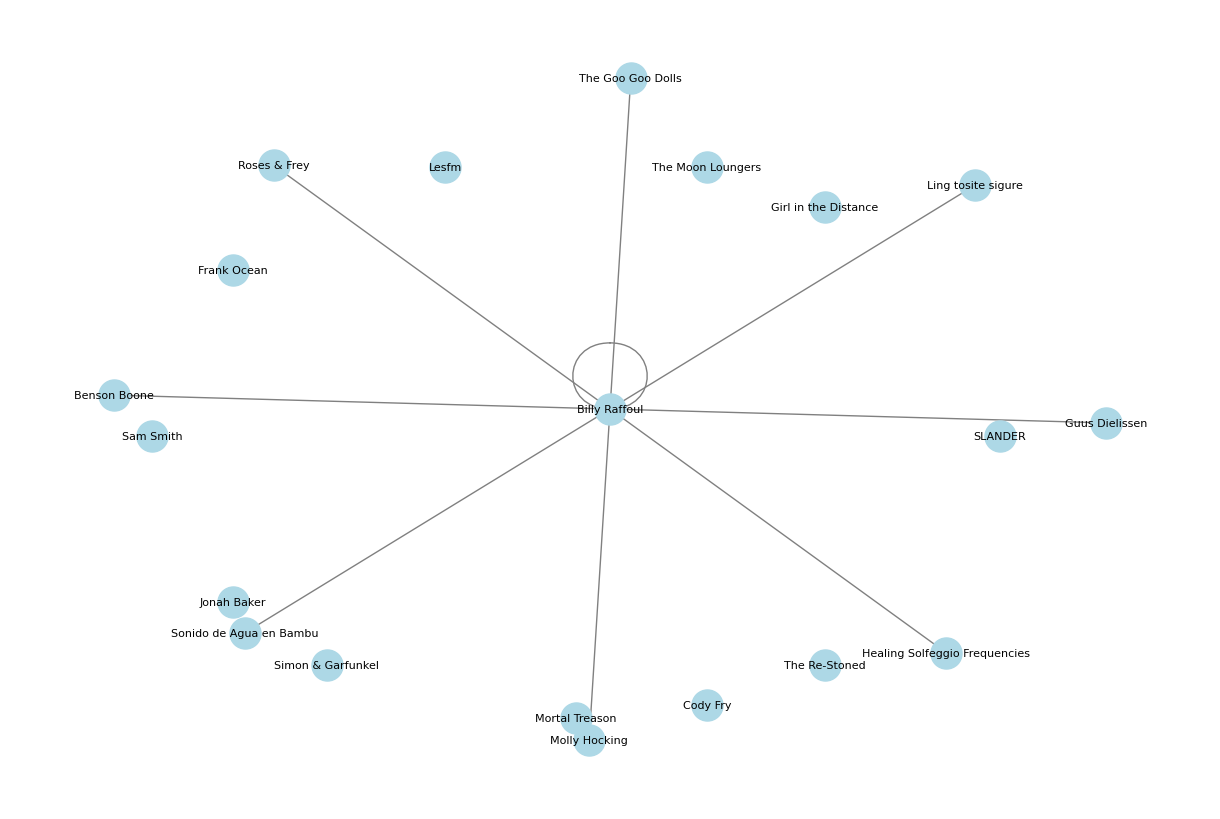

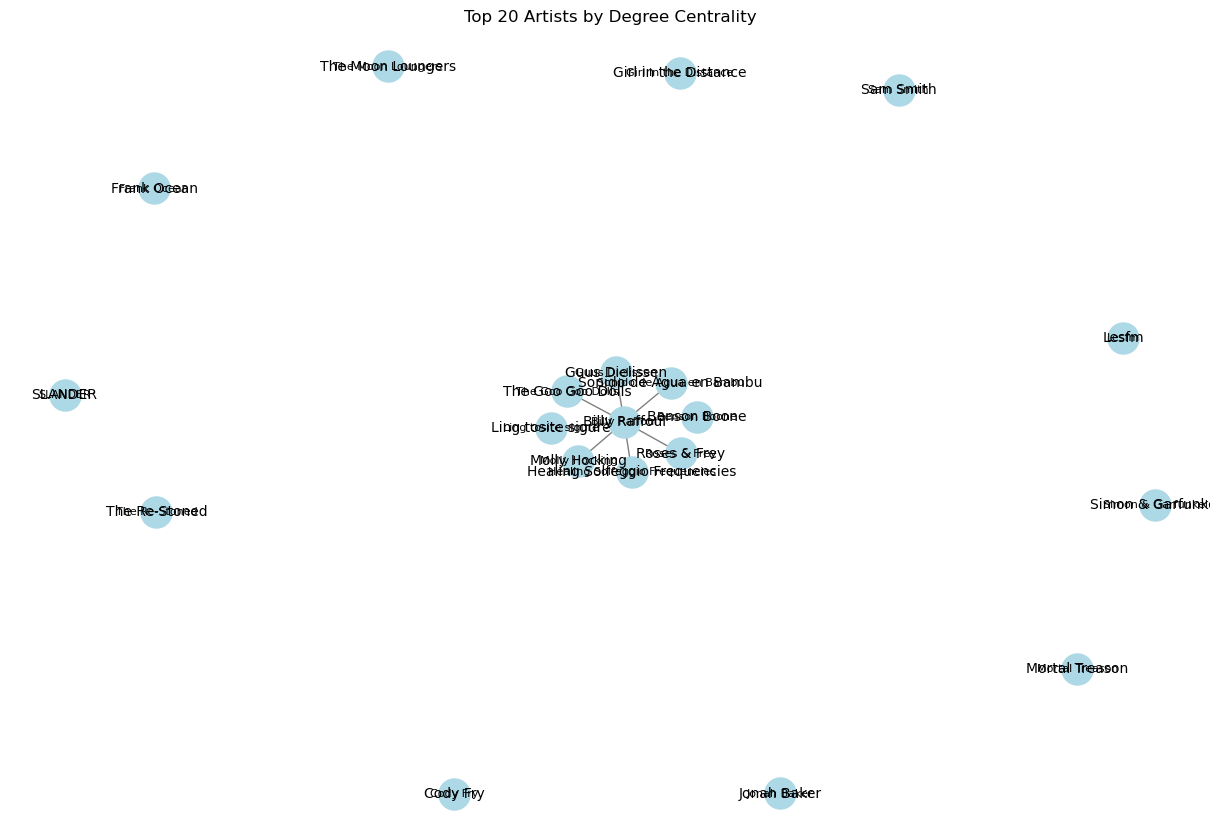

In [ ]:
#Degree Centrality

# Get top artists based on degree centrality
top_artists = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:top_k]

# Extract subgraph of top artists
top_g = g.subgraph(top_artists)

# Visualization
plt.figure(figsize=(12, 8))

# Use spring layout for better visualization
pos = nx.spring_layout(top_g)  

nx.draw(top_g, pos, with_labels=True, node_size=500, font_size=8, node_color="lightblue", edge_color="gray")

# Ensure 'artists' attribute exists in nodes
labels = {node: g.nodes[node].get('name', node) for node in top_g.nodes()}
nx.draw_networkx_labels(top_g, pos, labels, font_size=10)

plt.title("Top 20 Artists by Degree Centrality")
plt.show()


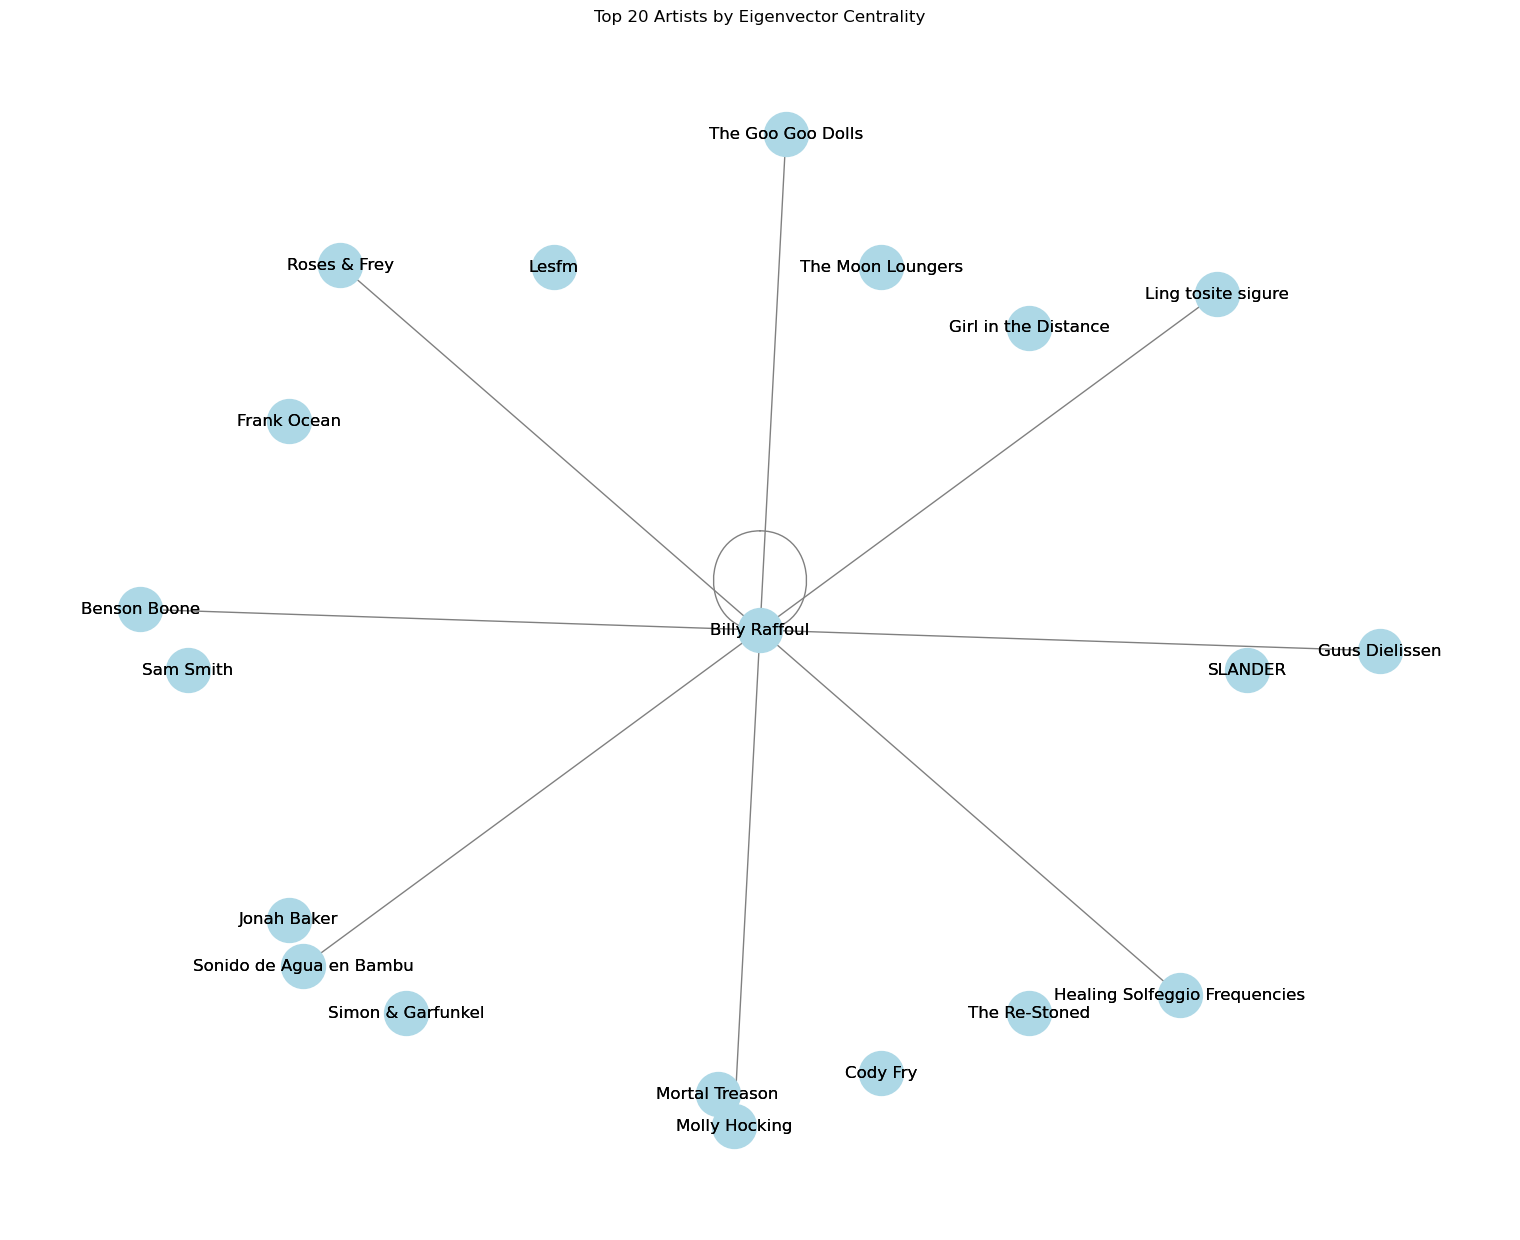

In [70]:
#Eigenvector Centrality
# Assuming eigenvector_centrality is already computed and top_k is set
top_artists = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:top_k]

# Extract subgraph of top artists
top_g = g.subgraph(top_artists)

# Visualization
plt.figure(figsize=(15, 12))  # Larger figure size

# Use Kamada-Kawai layout for better spacing
pos = nx.kamada_kawai_layout(top_g, weight=None)  # Use this for better node separation

# Draw the graph with better spacing
nx.draw(top_g, pos, with_labels=True, node_size=1000, font_size=12, node_color="lightblue", edge_color="gray")

# Ensure 'artists' attribute exists in nodes
labels = {node: g.nodes[node].get('name', node) for node in top_g.nodes()}
nx.draw_networkx_labels(top_g, pos, labels, font_size=12)

plt.title("Top 20 Artists by Eigenvector Centrality")
plt.show()

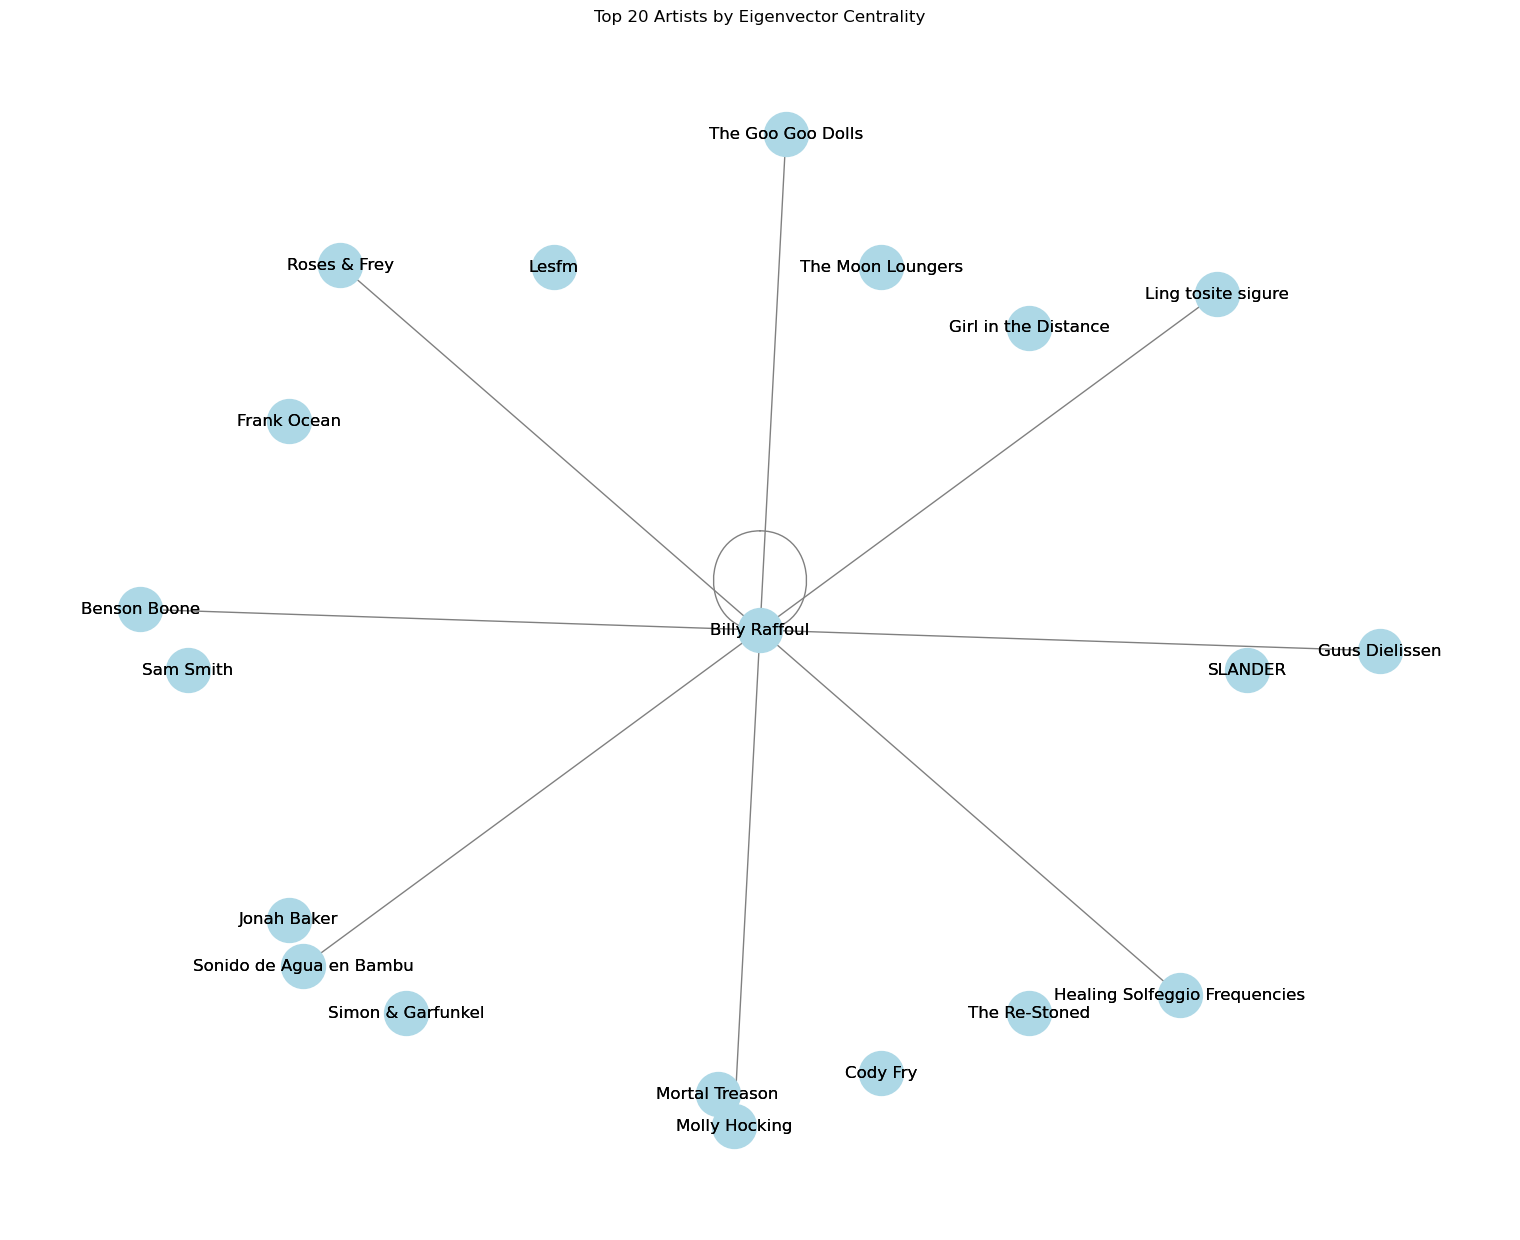

In [71]:
#Closeness Centrality
# Assuming eicloseness_centrality genvector_centrality is already computed and top_k is set
top_artists = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:top_k]

# Extract subgraph of top artists
top_g = g.subgraph(top_artists)

# Visualization
plt.figure(figsize=(15, 12))  # Larger figure size

# Use Kamada-Kawai layout for better spacing
pos = nx.kamada_kawai_layout(top_g, weight=None)  # Use this for better node separation

# Draw the graph with better spacing
nx.draw(top_g, pos, with_labels=True, node_size=1000, font_size=12, node_color="lightblue", edge_color="gray")

# Ensure 'artists' attribute exists in nodes
labels = {node: g.nodes[node].get('name', node) for node in top_g.nodes()}
nx.draw_networkx_labels(top_g, pos, labels, font_size=12)

plt.title("Top 20 Artists by Eigenvector Centrality")
plt.show()